## Import des librairies ##

In [1]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

:1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train = pd.read_csv('/content/drive/MyDrive/Data_Science/passagers.csv')
print(train.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [13]:
test = pd.read_csv('/content/drive/MyDrive/Data_Science/test.csv')
print(test.head(10))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

1.3 Afficher les informations des deux DataFrames train et Test.

In [14]:
# les infos du DataFrame train
print("Informations du DataFrame train :")
print(train.info())
print("\nPremières lignes du DataFrame train :")
print(train.head())

# les infos du DataFrame test
print("\nInformations du DataFrame test :")
print(test.info())
print("\nPremières lignes du DataFrame test :")
print(test.head())

Informations du DataFrame train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Premières lignes du DataFrame train :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4        

1.4 Calculer le taux global de survie

In [15]:
# Survival DataFrame train
survival_rate = train['Survived'].mean()
print(f"Taux global de survie : {survival_rate:.2%}")

Taux global de survie : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?
Pour préparer les données à être utilisées dans un modèle, des étapes de nettoyage et de transformation sont nécessaires. Par exemple, une étape de gestion de valeur manquante, la création de nouveaux targets, de l'encodage.




#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?

Le DataFrame train contient un champ supplémentaire (Survived), qui indique si un passager a survécu. "1" si oui, "0" si non.




#### Question 3 : Quel est le rôle de ces deux sets de données ?
Le dataframe Train a pour role de jeu d'entraînement pour former le modèle. Ce dataframe nous apprend les relations entre les features et la variable cible

Le dataframe Test a pour role d'évaluer le modèle sur des données qu'il n'a jamais vues.



## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [16]:
# Analyse de la variable Classe (Pclass) sur le taux de survie
class_survival = train.groupby('Pclass')['Survived'].mean() * 100
print("Taux de survie par classe :")
print(class_survival)

Taux de survie par classe :
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [17]:
# Analyse la variable Genre (Sex) sur le taux de survie
gender_survival = train.groupby('Sex')['Survived'].mean() * 100
print("Taux de survie par genre :")
print(gender_survival)

Taux de survie par genre :
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [18]:
# Ajout de la colonne FamilySize pour "train" et "test"
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# DataFrame train
print("Aperçu de la colonne FamilySize dans le DataFrame train :")
print(train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].head(10))

# DataFrame test
print("\nAperçu de la colonne FamilySize dans le DataFrame test :")
print(test[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].head(10))


Aperçu de la colonne FamilySize dans le DataFrame train :
   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  FamilySize  
0    male           2  
1  female           2  
2  female           1  
3  female           

2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

In [19]:
# Visualisation du nombre de personnes et le taux de survie par taille de famille
family_survival = train.groupby('FamilySize')['Survived'].agg(['count', 'mean'])
family_survival['mean'] = family_survival['mean'] * 100

print("\nNombre de personnes et taux de survie par taille de famille :")
print(family_survival)


Nombre de personnes et taux de survie par taille de famille :
            count       mean
FamilySize                  
1             537  30.353818
2             161  55.279503
3             102  57.843137
4              29  72.413793
5              15  20.000000
6              22  13.636364
7              12  33.333333
8               6   0.000000
11              7   0.000000


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [20]:
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

print("\nExemples de la colonne IsAlone (train) :")
print(train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].head(10))

print("\nExemples de la colonne IsAlone (test) :")
print(test[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].head(10))


Exemples de la colonne IsAlone (train) :
   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  IsAlone  
0    male        0  
1  female        0  
2  female        1  
3  female        0  
4    male        1  
5    m

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

In [21]:
# Visualisation par statut seul ou pas
isalone_survival = train.groupby('IsAlone')['Survived'].mean()

print("Taux de survie par statut seul ou pas")
print(isalone_survival)


Taux de survie par statut seul ou pas
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [22]:
from sklearn.feature_selection import mutual_info_regression

# Préparer les données pour le calcul
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = train[features].copy()

# Encodage des variables catégoriques et gestion des NaN
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
X.fillna(0, inplace=True)

y = train['Survived']

# Calcul de l'information mutuelle
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=features).sort_values(ascending=False)

# Afficher les scores
print("Scores d'information mutuelle :")
print(mi_scores)

Scores d'information mutuelle :
Fare          0.139559
Sex           0.132878
Embarked      0.068197
Pclass        0.052688
Parch         0.028651
Age           0.024436
IsAlone       0.019536
FamilySize    0.018001
SibSp         0.000000
dtype: float64


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

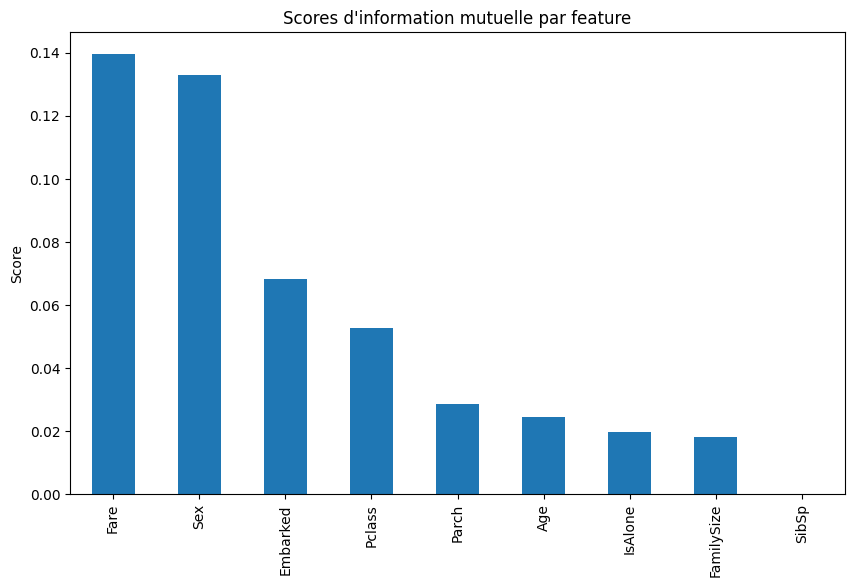

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title("Scores d'information mutuelle par feature")
plt.ylabel("Score")
plt.show()

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?

Oui, la variable Pclass (Classe) est utile pour prévoir la survie, car les analyses montrent le lien entre la classe et le taux de survie. Exemple : 1ère classe : taux de survie élevé,
2ème classe : taux de survie intermédiaire,
3ème classe : taux de survie faible


### Question 2 : Même question pour la variable Sex
Oui, la variable Sex (Genre) est très utile pour prévoir la survie. Lors de l'analyse, on constate que les femmes ont un taux de survie significativement plus élevé que les hommes :

Femmes : Taux de survie élevé (~75%).
Hommes : Taux de survie faible (~20-25%).

### Question 3 : Comment traiter le variables liées à la famille du passager ?

FamilySize est la variable la plus pertinente (score ~0.043) parmi celles liées à la famille. Elle capture efficacement les informations de SibSp et Parch. Il est donc préférable d'utiliser FamilySize directement, ou d'explorer d'autres transformations combinant ces variables pour maximiser leur impact.





## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [24]:
# Remplissage des valeurs nulles de la variable Embarked

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

print("Valeurs manquantes dans Embarked corrigées.")


Valeurs manquantes dans Embarked corrigées.


<ipython-input-24-a82b1e57a6e6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
<ipython-input-24-a82b1e57a6e6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

3.2 Afficher l'influence du port d'embarquement sur la Survie

In [25]:
# Influence du port d'embarquement sur la survie
embarked_survival = train.groupby('Embarked')['Survived'].mean() * 100
print("Taux de survie par port d'embarquement :")
print(embarked_survival)

Taux de survie par port d'embarquement :
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [26]:
# Remplacer les valeurs manquantes de Fare par la médiane
train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

print("Valeurs manquantes dans Fare corrigées.")

Valeurs manquantes dans Fare corrigées.


<ipython-input-26-378960007815>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Fare'].fillna(train['Fare'].median(), inplace=True)
<ipython-input-26-378960007815>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [27]:
# Découpage de Fare en 4 catégories
train['CategoricalFare'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['CategoricalFare'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])

print("Aperçu des nouvelles catégories de Fare dans le DataFrame train :")
print(train[['Fare', 'CategoricalFare']].head(10))


Aperçu des nouvelles catégories de Fare dans le DataFrame train :
      Fare CategoricalFare
0   7.2500               1
1  71.2833               4
2   7.9250               2
3  53.1000               4
4   8.0500               2
5   8.4583               2
6  51.8625               4
7  21.0750               3
8  11.1333               2
9  30.0708               3


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

In [28]:
print("Taux de survie par catégorie de prix de ticket :")
print(train.groupby('CategoricalFare')['Survived'].mean() * 100)

Taux de survie par catégorie de prix de ticket :
CategoricalFare
1    19.730942
2    30.357143
3    45.495495
4    58.108108
Name: Survived, dtype: float64


<ipython-input-28-65698f868476>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('CategoricalFare')['Survived'].mean() * 100)


3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [29]:
# Nombre de valeurs manquantes dans Age
missing_age_train = train['Age'].isnull().sum()
missing_age_test = test['Age'].isnull().sum()
print(f"Nombre de valeurs manquantes dans train : {missing_age_train}")
print(f"Nombre de valeurs manquantes dans test : {missing_age_test}")

# Compléter les valeurs manquantes
age_mean = train['Age'].mean()
age_std = train['Age'].std()

# DataFrame train
age_random_train = np.random.randint(age_mean - age_std, age_mean + age_std, size=missing_age_train)
train.loc[train['Age'].isnull(), 'Age'] = age_random_train

# DataFrame test
age_random_test = np.random.randint(age_mean - age_std, age_mean + age_std, size=missing_age_test)
test.loc[test['Age'].isnull(), 'Age'] = age_random_test

print("Valeurs manquantes complétées dans Age.")


Nombre de valeurs manquantes dans train : 177
Nombre de valeurs manquantes dans test : 86
Valeurs manquantes complétées dans Age.


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [30]:
# Découpage d'Age en 5 tranches pour train et test
train['CategoricalAge'] = pd.cut(train['Age'], 5, labels=[1, 2, 3, 4, 5])
test['CategoricalAge'] = pd.cut(test['Age'], 5, labels=[1, 2, 3, 4, 5])

print("Aperçu des nouvelles catégories d'Age dans le DataFrame train :")
print(train[['Age', 'CategoricalAge']].head(10))

Aperçu des nouvelles catégories d'Age dans le DataFrame train :
    Age CategoricalAge
0  22.0              2
1  38.0              3
2  26.0              2
3  35.0              3
4  35.0              3
5  15.0              1
6  54.0              4
7   2.0              1
8  27.0              2
9  14.0              1


3.8 Analyser l'effet de ces catégories de prix de ticket sur la survie.

In [31]:
# Calcule du taux de survie par catégorie d'âge

print("Taux de survie par catégorie d'âge :")
print(train.groupby('CategoricalAge')['Survived'].mean() * 100)

Taux de survie par catégorie d'âge :
CategoricalAge
1    51.818182
2    35.189310
3    38.095238
4    43.478261
5     9.090909
Name: Survived, dtype: float64


<ipython-input-31-7b3c02776739>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('CategoricalAge')['Survived'].mean() * 100)


### Question 1 : Classer les variables par ordre d'intérêt
Sex > Fare > Pclass > Age > FamilySize > IsAlone

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

In [32]:
# Extraction des noms permettant de retrouver le titre depuis le nom du passager
train['Title'] = train['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

print("Titres du DataFrame train :")
print(train['Title'].unique())

print("\nTitres du DataFrame test :")
print(test['Title'].unique())


Titres du DataFrame train :
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']

Titres du DataFrame test :
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

In [33]:
# Affichage du nombre d'occurrences des titres dans DataFrame train
title_sex_crosstab = pd.crosstab(train['Title'], train['Sex'])
print("Occurrences des titres par sexe :")
print(title_sex_crosstab)

Occurrences des titres par sexe :
Sex           female  male
Title                     
Capt               0     1
Col                0     2
Don                0     1
Dr                 1     6
Jonkheer           0     1
Lady               1     0
Major              0     2
Master             0    40
Miss             182     0
Mlle               2     0
Mme                1     0
Mr                 0   517
Mrs              125     0
Ms                 1     0
Rev                0     6
Sir                0     1
the Countess       1     0


4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

In [34]:
title_replacements = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
}
train['Title'] = train['Title'].replace(title_replacements)
test['Title'] = test['Title'].replace(title_replacements)

rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

print("Titres après regroupement :")
print(train['Title'].value_counts())

title_survival = train.groupby('Title')['Survived'].mean() * 100
print("\nTaux de survie par titre :")
print(title_survival)

Titres après regroupement :
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Taux de survie par titre :
Title
Master    57.500000
Miss      70.270270
Mr        15.667311
Mrs       79.365079
Rare      34.782609
Name: Survived, dtype: float64


## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

In [35]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

print("Valeurs numériques attribuées au genre.")

Valeurs numériques attribuées au genre.


5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

In [36]:
title_mapping_numeric = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4}
train['Title'] = train['Title'].map(title_mapping_numeric)
test['Title'] = test['Title'].map(title_mapping_numeric)

print("Valeurs numériques attribuées aux titres.")

Valeurs numériques attribuées aux titres.


5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

In [37]:
train.loc[:, 'Title'] = train['Title'].fillna(0)
test.loc[:, 'Title'] = test['Title'].fillna(0)

train['Title'] = train['Title'].astype(int)
test['Title'] = test['Title'].astype(int)

print("Titres manquants remplacés par 0 et type converti en entier.")

Titres manquants remplacés par 0 et type converti en entier.


5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

In [38]:
fare = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
train['CategoricalFare'] = train['CategoricalFare'].map(fare)
test['CategoricalFare'] = test['CategoricalFare'].map(fare)

print("Valeurs numériques attribuées aux catégories de Fare.")

Valeurs numériques attribuées aux catégories de Fare.


5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

In [39]:
embarked = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked)
test['Embarked'] = test['Embarked'].map(embarked)

print("Valeurs numériques attribuées au port d'embarquement.")

Valeurs numériques attribuées au port d'embarquement.


5.6 Supprimer les features inutiles

In [40]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

print("Colonnes inutiles supprimées :", columns_to_drop)

Colonnes inutiles supprimées : ['Name', 'Ticket', 'Cabin']


5.7 Afficher les infos pour les deux datasets

In [41]:
print("\nInformations sur le dataset train :")
print(train.info())

print("\nInformations sur le dataset test :")
print(test.info())


Informations sur le dataset train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Sex              891 non-null    int64   
 4   Age              891 non-null    float64 
 5   SibSp            891 non-null    int64   
 6   Parch            891 non-null    int64   
 7   Fare             891 non-null    float64 
 8   Embarked         891 non-null    int64   
 9   FamilySize       891 non-null    int64   
 10  IsAlone          891 non-null    int64   
 11  CategoricalFare  0 non-null      float64 
 12  CategoricalAge   891 non-null    category
 13  Title            891 non-null    int64   
dtypes: category(1), float64(3), int64(10)
memory usage: 91.7 KB
None

Informations sur le dataset test :


5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)

In [42]:
train.to_csv('train_preprocessed.csv', index=False)
test.to_csv('test_preprocessed.csv', index=False)

print("Datasets sauvegardés dans 'train_preprocessed.csv' et 'test_preprocessed.csv'.")

Datasets sauvegardés dans 'train_preprocessed.csv' et 'test_preprocessed.csv'.
